In [150]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [151]:

COLUMN_NAME_FOR_RECORD_NUMBER = 'Unnamed: 0'
COLUMN_NAME_FOR_DATE = 'Unnamed: 1'

LINE_NUMBER_FOR_UNITS_OF_MEASUREMENT = 1

COLUMN_AXIS = 1
ROW_AXIS = 0

BASE_OF_LOGARITHM_FOR_ENTROPY = 2

TARGET_VARIABLES = ['G_total(кг/с)', 'КГФ(г/м3)', 'КГФ(т/тыс.м3)']


def add_unit_of_measurement_to_column_names(df: pd.DataFrame) -> pd.DataFrame:
    columns = list(df)
    new_columns = []
    for col in range(0, len(list(df))):
        measurement = "".join(df.iloc[0, col].split())
        new_column_name = columns[col] + '(' + measurement + ')'
        if new_column_name not in new_columns:
            new_columns.append(new_column_name)
            continue
        new_columns.append('%s%s%s' % (new_column_name, '_', str(new_columns.count(new_column_name))))

    df = df.drop(LINE_NUMBER_FOR_UNITS_OF_MEASUREMENT)
    df.columns = new_columns

    return df


def fix_incorrect_number_format(df: pd.DataFrame) -> pd.DataFrame:
    df = df.replace(',', '.', regex=True)
    for col in df.columns:
        df[col] = df[col].astype(str).str.extract(r'(\d*[\.]?\d*)')
    return df


def delete_uninformative_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(columns=[COLUMN_NAME_FOR_RECORD_NUMBER, COLUMN_NAME_FOR_DATE])
    return df


def format_data_frame(df: pd.DataFrame) -> pd.DataFrame:
    df = delete_uninformative_data(df)

    # set the location of the first row with columns
    df.columns = df.iloc[0]
    # remove first row from the dataframe rows
    df = df[1:]

    df = add_unit_of_measurement_to_column_names(df)

    df = fix_incorrect_number_format(df)
    df = df.replace('', None)
    df = df.astype(float)

    return df


data_frame = pd.read_excel('data.xlsx', sheet_name='VU')
data_frame = format_data_frame(data_frame)
data_frame

C:\Users\Elizaveta\PycharmProjects\lab_1\venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Глубина манометра(м),Dшт(мм),Руст(бара),Рзаб(бара),Pлин(бара),Руст(бар),Рзаб(бар),Рлин(бар),Туст(С),Тна шлейфе(С),Тзаб(С),Tлин(С),Дебит газа(1000м3/сут),Дебит ст. конд.(м3/сут),Дебит воды(м3/сут),Дебит смеси(1000м3/сут),Дебит гааз(м3/сут),Дебит кон нестабильный(м3/сут),Дебит воды(м3/сут)_1,Нэф(м),Рпл. Тек (послед точка на КВД)(МПа),Рпл. Тек (Расчет по КВД)(МПа),Рпл. Тек (Карноухов)(МПа),Pсб(атм),Pсб(бар),Ro_g(кг/м3),Ro_c(кг/м3),Ro_w(кг/м3),Удельная плотность газа (б/р),G_total(кг/с),КГФ(г/м3),КГФ(т/тыс.м3)
2,3576.3,7.94,249.600000,370.100000,101.800000,249.000000,359.600000,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25000,56.5000,NaN,93.600000,92.376018,0.806017,801.00,1000.0,0.669449,2.782623,311.909400,NaN
3,3576.3,9.53,233.500000,364.600000,101.300000,231.000000,338.100000,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25000,56.5000,NaN,92.900000,91.685171,0.806017,801.00,1000.0,0.669449,3.697781,288.600300,NaN
4,3576.3,11.11,213.400000,357.100000,101.600000,211.000000,314.800000,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25000,56.5000,NaN,91.400000,90.204787,0.806017,801.00,1000.0,0.669449,4.515073,248.790600,NaN
5,3576.3,12.70,191.600000,347.400000,98.400000,187.000000,291.500000,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25000,56.5000,NaN,89.200000,88.033555,0.806017,801.00,1000.0,0.669449,5.217673,223.559100,NaN
6,3576.3,14.29,171.900000,337.700000,99.200000,169.000000,270.300000,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25000,56.5000,NaN,89.700000,88.527017,0.806017,801.00,1000.0,0.669449,5.765092,215.148600,NaN
7,3576.3,9.53,199.500000,286.400000,106.361669,199.500000,286.600000,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,268.896120,1921.000000,119.0,0.6,56.8000,41.22431,48.3000,NaN,90.700000,89.513940,0.812700,789.80,1000.0,0.675000,3.076542,241.130794,NaN
8,3590.0,7.93,284.317950,391.823775,NaN,284.317950,391.823775,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,206.056016,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3590.0,11.11,270.943050,384.224400,NaN,270.943050,384.224400,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,354.651203,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,3590.0,14.28,245.510475,371.912399,NaN,245.510475,371.912399,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,586.165220,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,3590.0,17.46,209.641425,346.192061,NaN,209.641425,346.192061,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,712.617222,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
COEF_FOR_KGF_MERGE = 0.000001


def merge_columns(df: pd.DataFrame, coefficient: float, remaining_column : str, column_to_be_deleted : str) -> pd.DataFrame:
    for i in range(0, len(df)):
        if pd.isnull(df.iloc[i][remaining_column]):
            df.iloc[i][remaining_column] = float(df.iloc[i][column_to_be_deleted]) * coefficient
    df = df.drop(column_to_be_deleted, axis=COLUMN_AXIS)
    return df


data_frame = merge_columns(data_frame, COEF_FOR_KGF_MERGE, 'КГФ(т/тыс.м3)', 'КГФ(г/м3)')
TARGET_VARIABLES.remove('КГФ(г/м3)')
data_frame

,Глубина манометра(м),Dшт(мм),Руст(бара),Рзаб(бара),Pлин(бара),Руст(бар),Рзаб(бар),Рлин(бар),Туст(С),Тна шлейфе(С),Тзаб(С),Tлин(С),Дебит газа(1000м3/сут),Дебит ст. конд.(м3/сут),Дебит воды(м3/сут),Дебит смеси(1000м3/сут),Дебит гааз(м3/сут),Дебит кон нестабильный(м3/сут),Дебит воды(м3/сут)_1,Нэф(м),Рпл. Тек (послед точка на КВД)(МПа),Рпл. Тек (Расчет по КВД)(МПа),Рпл. Тек (Карноухов)(МПа),Pсб(атм),Pсб(бар),Ro_g(кг/м3),Ro_c(кг/м3),Ro_w(кг/м3),Удельная плотность газа (б/р),G_total(кг/с),КГФ(т/тыс.м3)
2,3576.3,7.94,249.600000,370.100000,101.800000,249.000000,359.600000,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25000,56.5000,NaN,93.600000,92.376018,0.806017,801.00,1000.0,0.669449,2.782623,0.000312
3,3576.3,9.53,233.500000,364.600000,101.300000,231.000000,338.100000,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25000,56.5000,NaN,92.900000,91.685171,0.806017,801.00,1000.0,0.669449,3.697781,0.000289
4,3576.3,11.11,213.400000,357.100000,101.600000,211.000000,314.800000,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25000,56.5000,NaN,91.400000,90.204787,0.806017,801.00,1000.0,0.669449,4.515073,0.000249
5,3576.3,12.70,191.600000,347.400000,98.400000,187.000000,291.500000,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25000,56.5000,NaN,89.200000,88.033555,0.806017,801.00,1000.0,0.669449,5.217673,0.000224
6,3576.3,14.29,171.900000,337.700000,99.200000,169.000000,270.300000,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25000,56.5000,NaN,89.700000,88.527017,0.806017,801.00,1000.0,0.669449,5.765092,0.000215
7,3576.3,9.53,199.500000,286.400000,106.361669,199.500000,286.600000,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,268.896120,1921.000000,119.0,0.6,56.8000,41.22431,48.3000,NaN,90.700000,89.513940,0.812700,789.80,1000.0,0.675000,3.076542,0.000241
8,3590.0,7.93,284.317950,391.823775,NaN,284.317950,391.823775,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,206.056016,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3590.0,11.11,270.943050,384.224400,NaN,270.943050,384.224400,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,354.651203,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,3590.0,14.28,245.510475,371.912399,NaN,245.510475,371.912399,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,586.165220,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,3590.0,17.46,209.641425,346.192061,NaN,209.641425,346.192061,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,712.617222,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
def remove_features_by_power(df : pd.DataFrame, power : int):
    for col in df.columns:
        if col in TARGET_VARIABLES: continue
        if power[col] == 1:
            df = df.drop(col, axis=COLUMN_AXIS)

    return df


def remove_features_for_missing_values(df : pd.DataFrame):
    for col in df.columns:
        if col in TARGET_VARIABLES: continue
        missing_values = df[col].isna().sum()
        if missing_values > len(df) * 0.6:
            df = df.drop(col, axis=COLUMN_AXIS)

    return df


data_frame = remove_features_by_power(data_frame, data_frame.nunique())
data_frame = remove_features_for_missing_values(data_frame)
data_frame

,Глубина манометра(м),Dшт(мм),Руст(бара),Рзаб(бара),Pлин(бара),Руст(бар),Рзаб(бар),Рлин(бар),Туст(С),Тна шлейфе(С),Тзаб(С),Tлин(С),Дебит газа(1000м3/сут),Дебит ст. конд.(м3/сут),Дебит воды(м3/сут),Дебит смеси(1000м3/сут),Дебит гааз(м3/сут),Дебит кон нестабильный(м3/сут),Дебит воды(м3/сут)_1,Нэф(м),Рпл. Тек (послед точка на КВД)(МПа),Рпл. Тек (Расчет по КВД)(МПа),Рпл. Тек (Карноухов)(МПа),Pсб(атм),Pсб(бар),Ro_c(кг/м3),Удельная плотность газа (б/р),G_total(кг/с),КГФ(т/тыс.м3)
2,3576.3,7.94,249.600000,370.100000,101.800000,249.000000,359.600000,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25000,56.5000,NaN,93.600000,92.376018,801.00,0.669449,2.782623,0.000312
3,3576.3,9.53,233.500000,364.600000,101.300000,231.000000,338.100000,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25000,56.5000,NaN,92.900000,91.685171,801.00,0.669449,3.697781,0.000289
4,3576.3,11.11,213.400000,357.100000,101.600000,211.000000,314.800000,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25000,56.5000,NaN,91.400000,90.204787,801.00,0.669449,4.515073,0.000249
5,3576.3,12.70,191.600000,347.400000,98.400000,187.000000,291.500000,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25000,56.5000,NaN,89.200000,88.033555,801.00,0.669449,5.217673,0.000224
6,3576.3,14.29,171.900000,337.700000,99.200000,169.000000,270.300000,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25000,56.5000,NaN,89.700000,88.527017,801.00,0.669449,5.765092,0.000215
7,3576.3,9.53,199.500000,286.400000,106.361669,199.500000,286.600000,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,268.896120,1921.000000,119.0,0.6,56.8000,41.22431,48.3000,NaN,90.700000,89.513940,789.80,0.675000,3.076542,0.000241
8,3590.0,7.93,284.317950,391.823775,NaN,284.317950,391.823775,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,206.056016,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN
9,3590.0,11.11,270.943050,384.224400,NaN,270.943050,384.224400,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,354.651203,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN
10,3590.0,14.28,245.510475,371.912399,NaN,245.510475,371.912399,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,586.165220,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN
11,3590.0,17.46,209.641425,346.192061,NaN,209.641425,346.192061,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,712.617222,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN


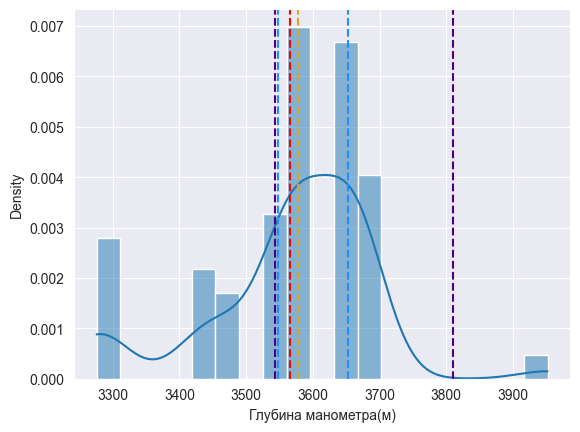

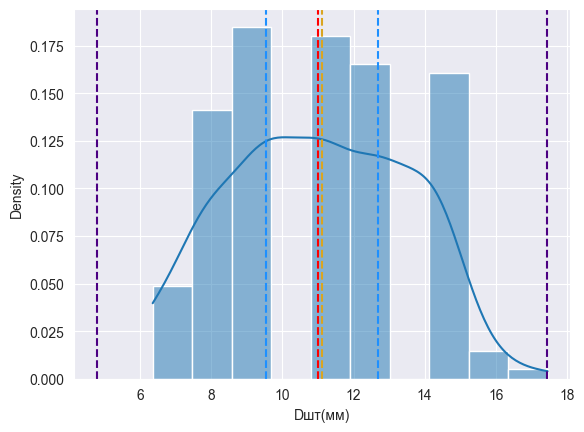

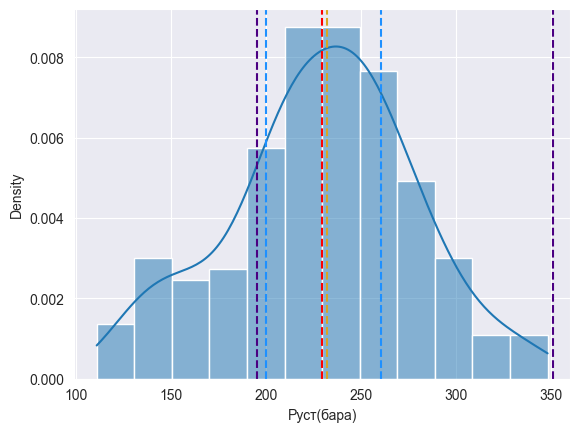

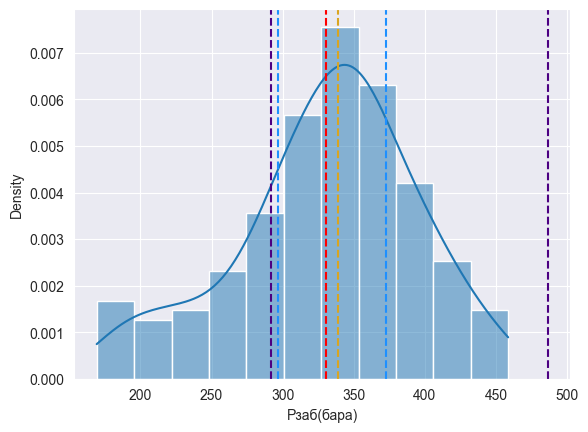

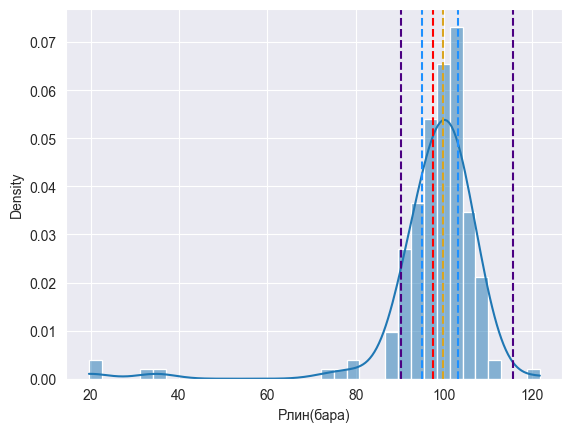

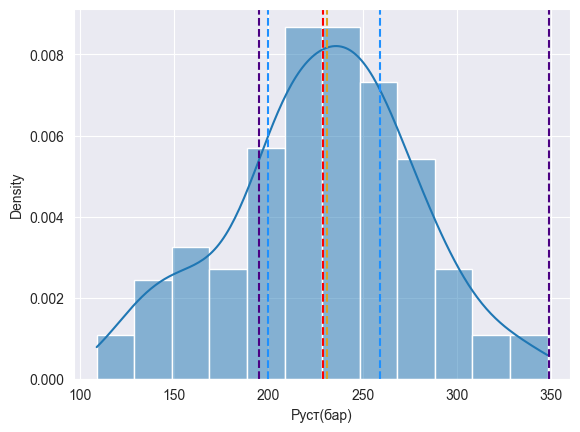

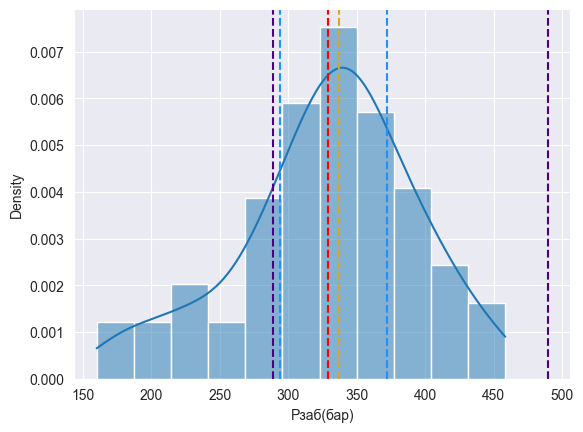

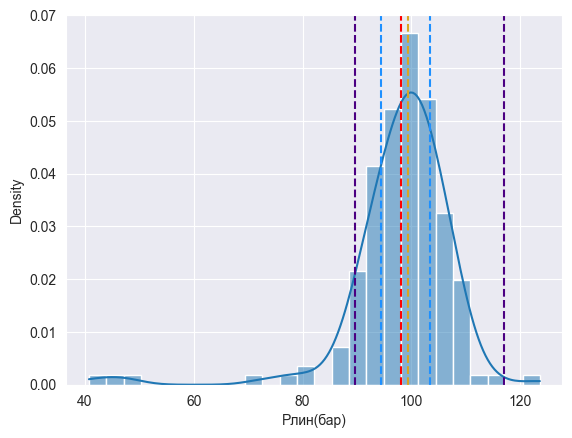

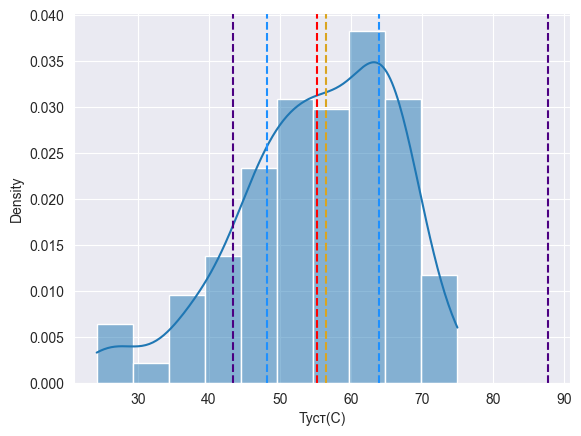

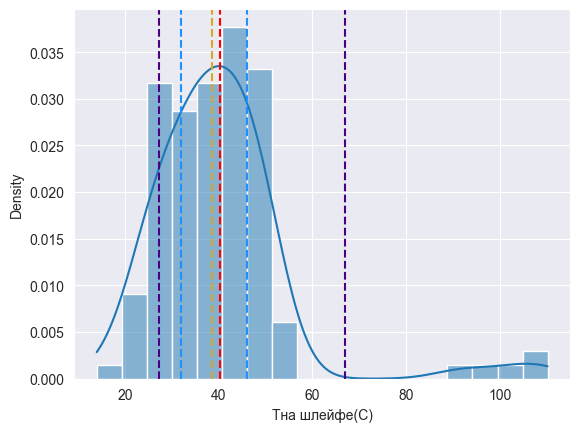

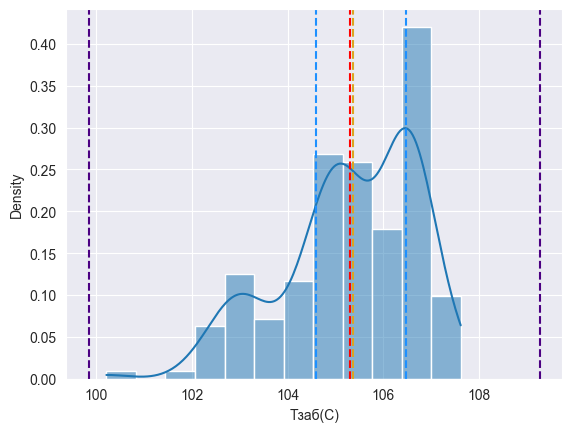

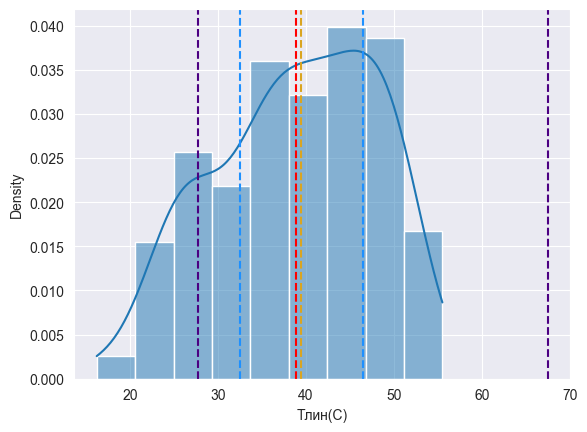

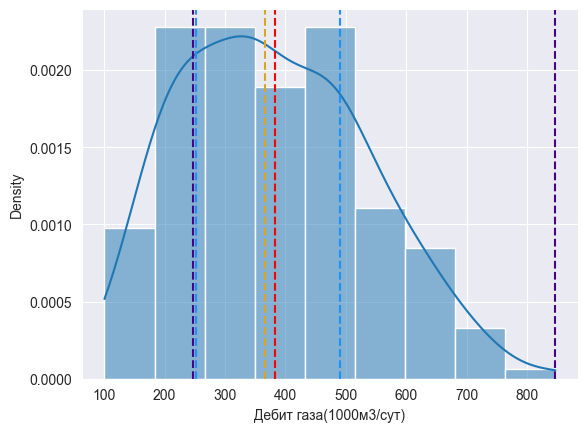

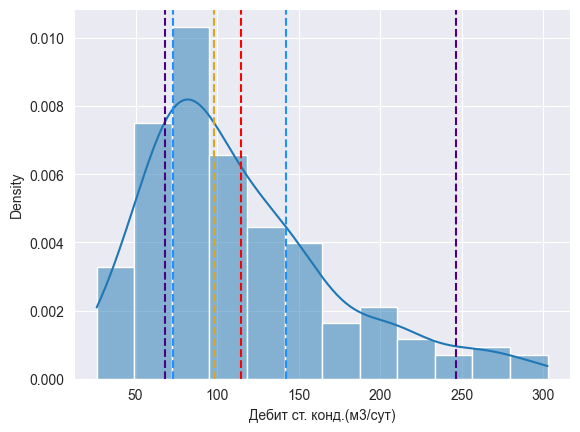

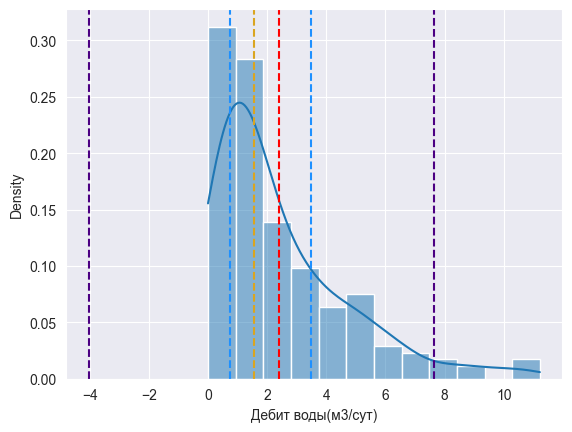

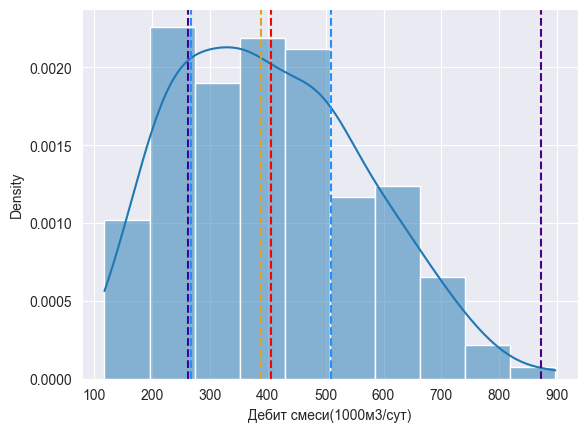

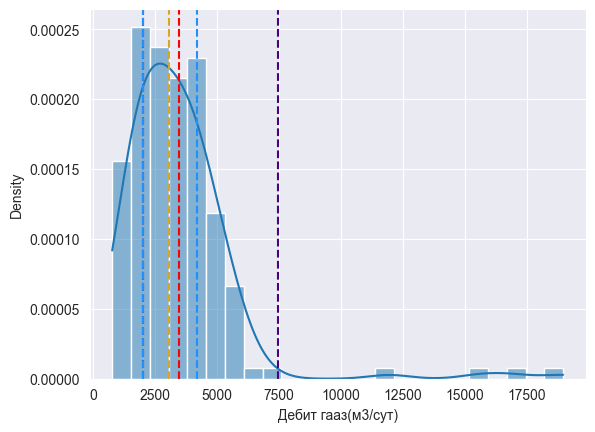

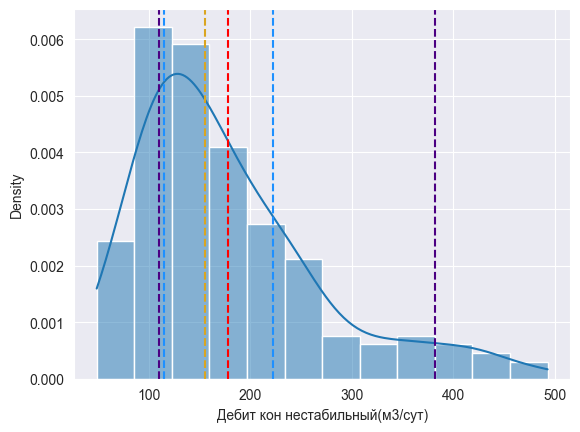

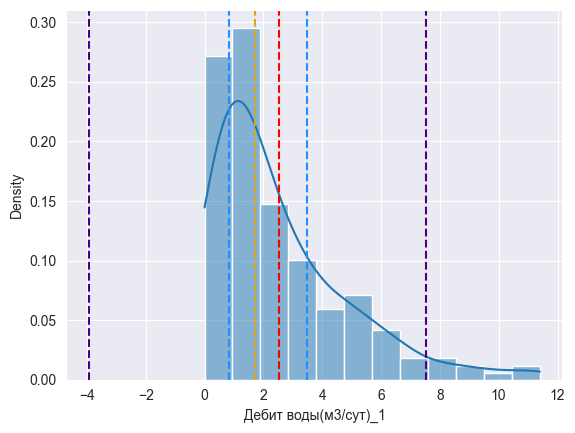

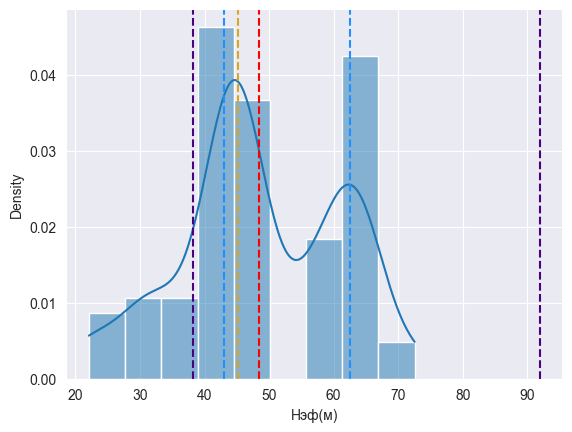

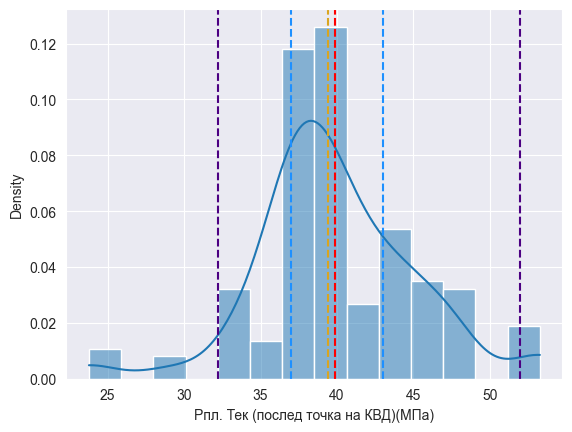

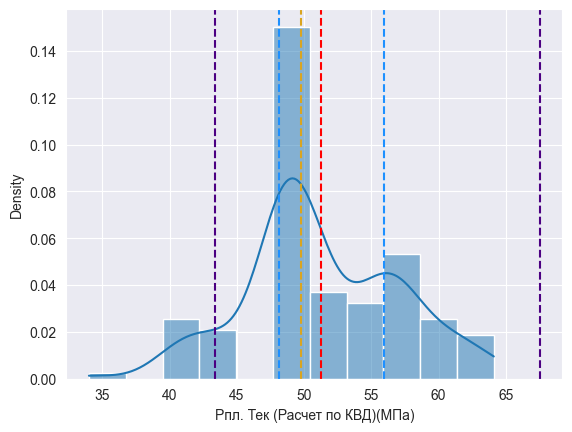

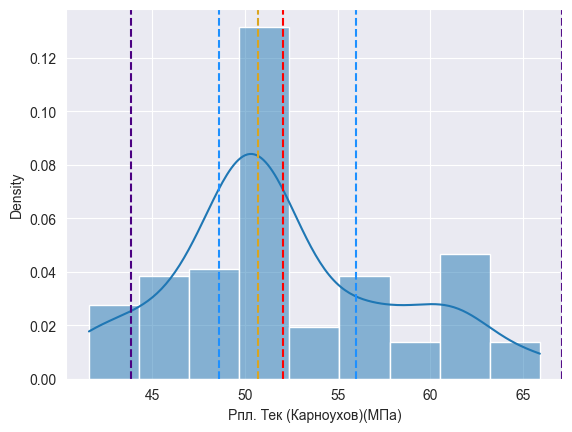

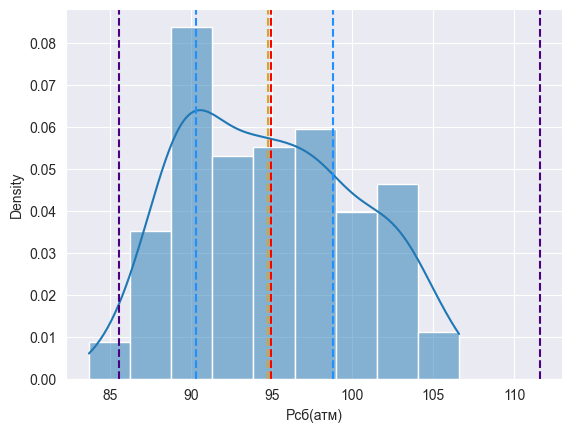

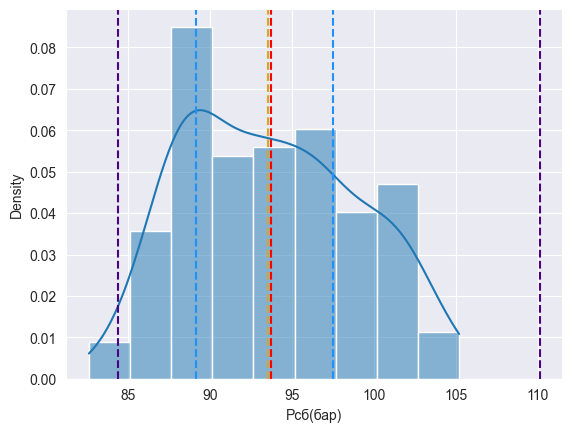

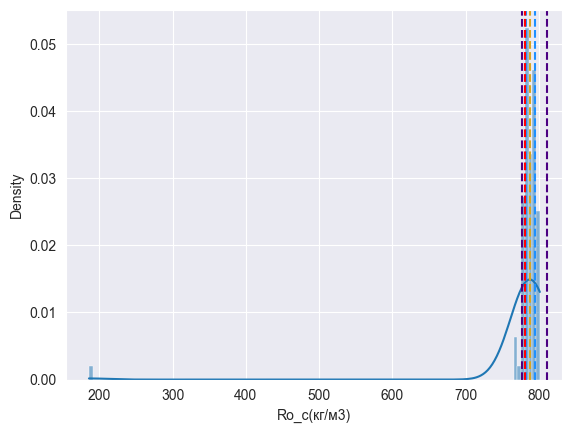

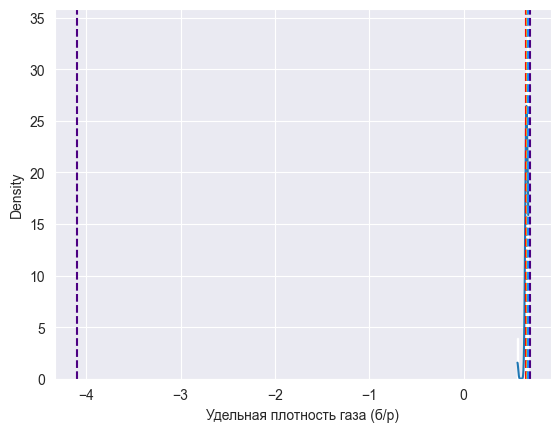

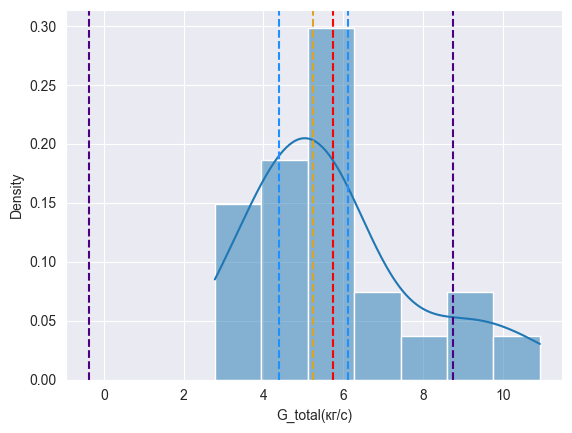

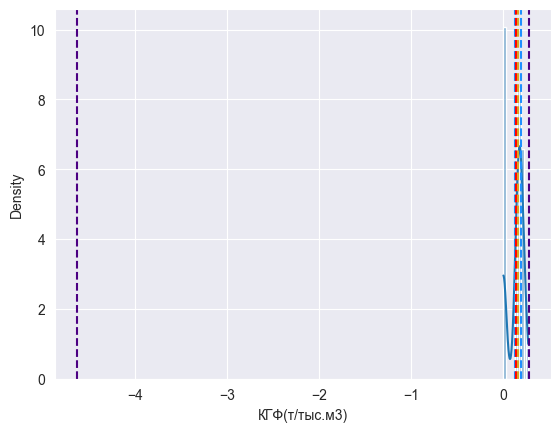

In [154]:
C = len(data_frame.columns)
L = len(data_frame.index)
CN = data_frame.count()  #количество значений не равных Nan
NP = ((L - CN) / L) * 100  #процент пропущенных значений
MN = data_frame.min()  #минимум
Q1 = data_frame.quantile(q=0.25)  #первый квартиль
MA = data_frame.mean()  #среднее значение
ME = data_frame.median()  #медиана
Q3 = data_frame.quantile(q=0.75)  #третий квартиль
MX = data_frame.max()  #максимум
ST = data_frame.std()  #стандартное отклонение
P = data_frame.nunique()  #мощность - количество неповторяющихся значений
IQ = Q3 - Q1  #интерквартильный размах


def draw_distributions(df: pd.DataFrame):
    frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
    frame = frame.T
    f = pd.DataFrame(frame)
    f.index = ['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль', 'Среднее', 'Медиана', 'Третий квартиль',
               'Максимум', 'Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)

    for i in df.columns:
        plt.figure(i)
        sns.histplot(df[i], kde=True, stat="density")
        plt.axvline(f.iloc[3][i] - 1.5 * f.iloc[10]["Dшт(мм)"], color="indigo", ls='--')  #q1-1.5*iqr
        plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--')  #первый квартиль
        plt.axvline(f.iloc[4][i], color="red", ls='--')  #среднее
        plt.axvline(f.iloc[5][i], color="goldenrod", ls='--')  #медиана
        plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--')  #третий квартиль
        plt.axvline(f.iloc[6][i] + 1.5 * f.iloc[10][i], color="indigo", ls='--')  #q3+1.5*iqr
        plt.show()


draw_distributions(data_frame)

In [155]:
def replace_emissions(df: pd.DataFrame, column_names : list, lower_bounds : list):
    index_of_column = 0
    for column in column_names:
        average = data_frame.loc[:, column].mean()
        for i in range(0, len(df)):
            if df.iloc[i][column] < lower_bounds[index_of_column]:
                df.at[i, column] = average
        index_of_column += 1


replace_emissions(data_frame, ['Pлин(бара)', 'Ro_c(кг/м3)'], [60, 300])
data_frame

,Глубина манометра(м),Dшт(мм),Руст(бара),Рзаб(бара),Pлин(бара),Руст(бар),Рзаб(бар),Рлин(бар),Туст(С),Тна шлейфе(С),Тзаб(С),Tлин(С),Дебит газа(1000м3/сут),Дебит ст. конд.(м3/сут),Дебит воды(м3/сут),Дебит смеси(1000м3/сут),Дебит гааз(м3/сут),Дебит кон нестабильный(м3/сут),Дебит воды(м3/сут)_1,Нэф(м),Рпл. Тек (послед точка на КВД)(МПа),Рпл. Тек (Расчет по КВД)(МПа),Рпл. Тек (Карноухов)(МПа),Pсб(атм),Pсб(бар),Ro_c(кг/м3),Удельная плотность газа (б/р),G_total(кг/с),КГФ(т/тыс.м3)
2,3576.3,7.94,249.600000,370.100000,101.800000,249.000000,359.600000,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25000,56.5000,NaN,93.600000,92.376018,801.000000,0.669449,2.782623,0.000312
3,3576.3,9.53,233.500000,364.600000,101.300000,231.000000,338.100000,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25000,56.5000,NaN,92.900000,91.685171,801.000000,0.669449,3.697781,0.000289
4,3576.3,11.11,213.400000,357.100000,101.600000,211.000000,314.800000,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25000,56.5000,NaN,91.400000,90.204787,801.000000,0.669449,4.515073,0.000249
5,3576.3,12.70,191.600000,347.400000,98.400000,187.000000,291.500000,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25000,56.5000,NaN,89.200000,88.033555,801.000000,0.669449,5.217673,0.000224
6,3576.3,14.29,171.900000,337.700000,99.200000,169.000000,270.300000,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25000,56.5000,NaN,89.700000,88.527017,801.000000,0.669449,5.765092,0.000215
7,3576.3,9.53,199.500000,286.400000,106.361669,199.500000,286.600000,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,268.896120,1921.000000,119.0,0.6,56.8000,41.22431,48.3000,NaN,90.700000,89.513940,789.800000,0.675000,3.076542,0.000241
8,3590.0,7.93,284.317950,391.823775,NaN,284.317950,391.823775,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,206.056016,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN
9,3590.0,11.11,270.943050,384.224400,NaN,270.943050,384.224400,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,354.651203,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN
10,3590.0,14.28,245.510475,371.912399,NaN,245.510475,371.912399,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,586.165220,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN
11,3590.0,17.46,209.641425,346.192061,NaN,209.641425,346.192061,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,712.617222,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

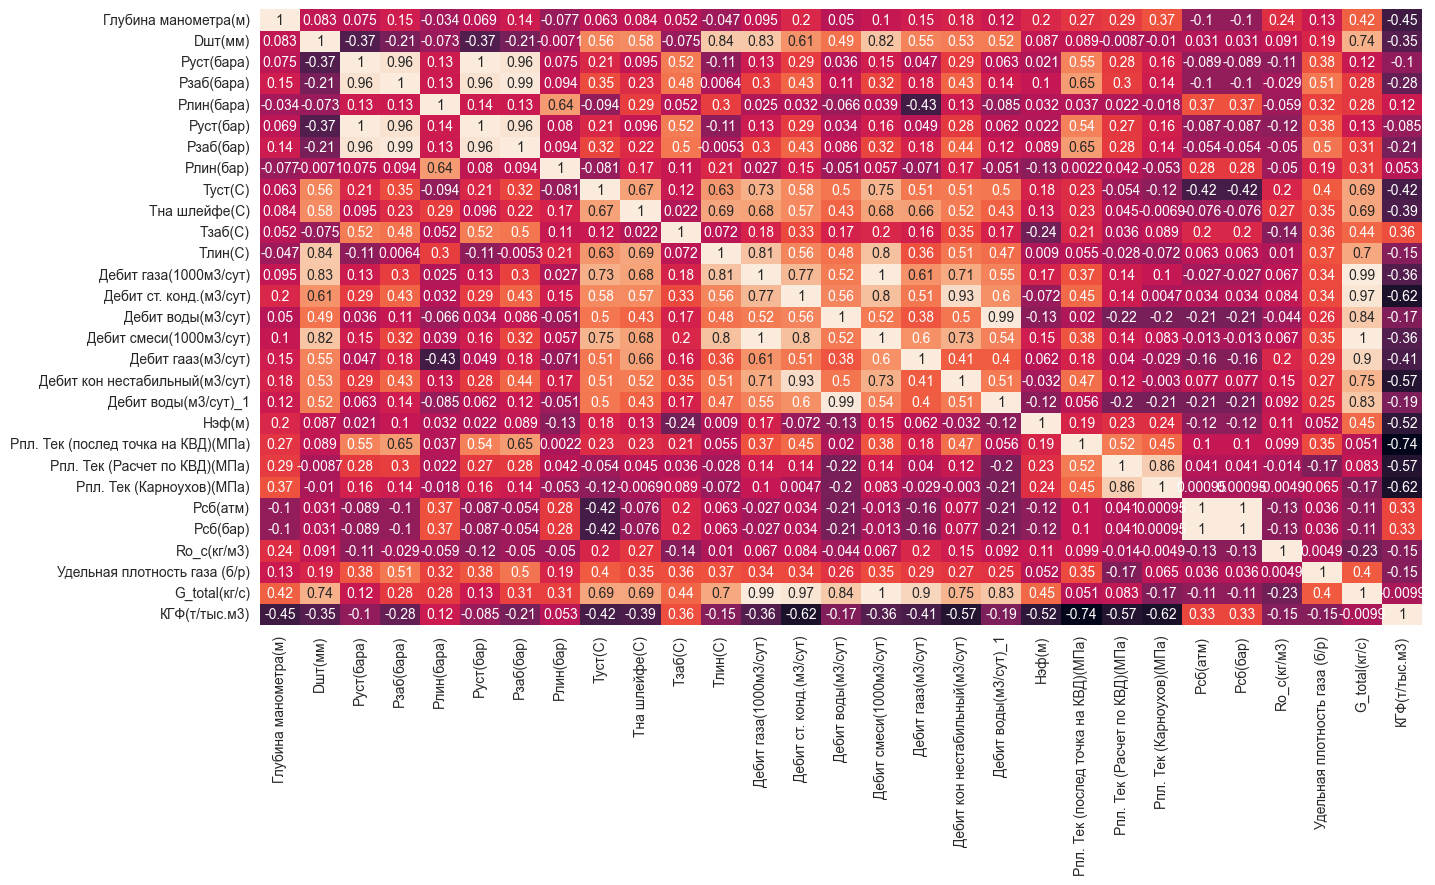

In [156]:
plt.figure(figsize=(15, 8))
sns.heatmap(data_frame.corr(method='pearson', numeric_only=True), annot=True, cbar=False)

<Axes: >

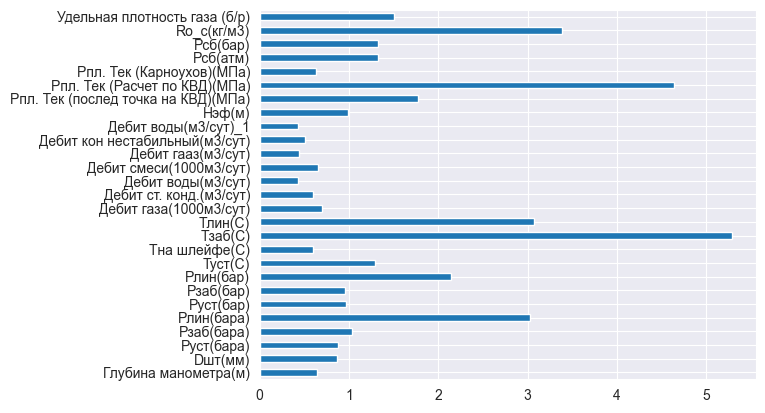

In [157]:
from pandas import Series
from math import isnan
from collections import defaultdict

BASE_OF_LOGARITHM_FOR_GAIN_RATIO = 2

MAX_ALLOWABLE_VALUE_OF_CORR_COEF = 0.95


def calculate_entropy(df : pd.DataFrame, col : str) -> float:
    entropy = 0
    delta = compute_delta(df, col)
    for i in range(0, compute_num_of_intervals(df, col)):
        start_interval = df[col].min() + i * delta
        number_of_occurrences = count_values_in_range(df[col], start_interval, start_interval + delta)
        if number_of_occurrences == 0: continue
        p_i = number_of_occurrences / df[col].count()
        entropy -= p_i * math.log(p_i, BASE_OF_LOGARITHM_FOR_GAIN_RATIO)

    return entropy


def find_rows_with_values_in_interval(df: pd.DataFrame, column_name: str, range_min: float, range_max: float,
                                      is_last_interval: bool) -> list:
    rows = []
    index = 0
    for val in df[column_name]:
        if range_min <= val < range_max:
            rows.append(index)
        if is_last_interval and val == range_max:
            rows.append(index)
        index += 1
    return rows


def compute_num_of_not_null_values_in_both(df: pd.DataFrame, feature_column: str, target_column: str) -> int:
    res = 0
    for i in range(0, len(df)):
        if df.iloc[i][feature_column] is not None and df.iloc[i][target_column] is not None:
            res += 1
    return res


def find_indexes_of_not_null_values(df: pd.DataFrame, column_name: str) -> list:
    indexes = []
    index = 0
    for val in df[column_name]:
        if not isnan(val): indexes.append(index)
        index += 1
    return indexes


def compute_conditional_entropy_with_feature_rows(df: pd.DataFrame, target_column: str, feature_rows: list) -> float:
    entropy = 0
    target_delta = compute_delta(df, target_column)
    for j in range(0, compute_num_of_intervals(df, target_column)):
        start_target_interval = df[target_column].min() + j * target_delta
        target_rows = find_rows_with_values_in_interval(df, target_column, start_target_interval,
                                                        start_target_interval + target_delta,
                                                        start_target_interval + target_delta == df[
                                                            target_column].max())
        rows = list(set(feature_rows) & set(target_rows))
        if len(rows) == 0: continue
        p_i = len(rows) / len(feature_rows)
        entropy -= p_i * math.log(p_i, BASE_OF_LOGARITHM_FOR_GAIN_RATIO)
    return entropy


def calculate_conditional_entropy(df: pd.DataFrame, feature_column: str, target_column: str) -> float:
    conditional_entropy = 0

    feature_delta = compute_delta(df, feature_column)

    for i in range(0, compute_num_of_intervals(df, feature_column)):
        start_feature_interval = df[feature_column].min() + i * feature_delta

        feature_rows = find_rows_with_values_in_interval(df, feature_column, start_feature_interval,
                                                         start_feature_interval + feature_delta,
                                                         start_feature_interval + feature_delta == df[
                                                             feature_column].max())
        feature_rows = list(set(feature_rows) & set(find_indexes_of_not_null_values(df, target_column)))
        if len(feature_rows) == 0: continue

        entropy = compute_conditional_entropy_with_feature_rows(df, target_column, feature_rows)

        num_of_non_null_rows = compute_num_of_not_null_values_in_both(df, feature_column, target_column)
        conditional_entropy += entropy * (len(feature_rows) / num_of_non_null_rows)

    # print('conditional_entropy', conditional_entropy)
    return conditional_entropy


def compute_info_gain_for_target_and_feature(df: pd.DataFrame, feature_column: str, target_column: str) -> float:
    return calculate_entropy(df, target_column) - calculate_conditional_entropy(df, feature_column, target_column)


def compute_split_info_for_feature(df: pd.DataFrame, feature_column: str) -> float:
    split_info = 0
    start_interval = df[feature_column].min()
    end_interval = start_interval + compute_delta(df, feature_column)
    for i in range(0, compute_num_of_intervals(df, feature_column)):
        number_of_occurrences = count_values_in_range(df[feature_column], start_interval, end_interval)
        p_i = number_of_occurrences / df[feature_column].count()
        split_info -= p_i * math.log(p_i, BASE_OF_LOGARITHM_FOR_GAIN_RATIO)
    return split_info


def compute_num_of_intervals(df: pd.DataFrame, column_name: str) -> int:
    return int(1 + math.log(df.count()[column_name], BASE_OF_LOGARITHM_FOR_GAIN_RATIO))


def compute_delta(df: pd.DataFrame, column_name: str) -> float:
    return (df[column_name].max() - df[column_name].min()) / compute_num_of_intervals(df, column_name)


def count_values_in_range(series: Series, range_min: float, range_max: float) -> int:
    return series.between(left=range_min, right=range_max).sum()


def compute_gain_ratio_for_target_and_feature(df: pd.DataFrame, feature_column: str, target_column: str) -> float:
    return compute_info_gain_for_target_and_feature(df, feature_column, target_column) / compute_split_info_for_feature(
        df, feature_column)


def compute_gain_ratio(df: pd.DataFrame) -> dict:
    gain_ratio = defaultdict(dict)
    for target_column in TARGET_VARIABLES:
        target_gain = {}
        for feature_column in df.columns:
            if feature_column in TARGET_VARIABLES: continue
            target_gain[feature_column] = compute_gain_ratio_for_target_and_feature(df, feature_column, target_column)
        gain_ratio[target_column] = target_gain
    return gain_ratio


def compute_less_important_feature(gain_ratio_dict: dict, first_column_name: str, second_column_name: str) -> str:
    importance_of_first = 0
    importance_of_second = 0
    for target_column in TARGET_VARIABLES:
        importance_of_first += gain_ratio_dict[target_column][first_column_name]
        importance_of_second += gain_ratio_dict[target_column][second_column_name]
    if importance_of_first > importance_of_second:
        return second_column_name
    return first_column_name


def remove_linearly_dependent_features(df: pd.DataFrame) -> pd.DataFrame:
    corr_matrix = df.corr(method='pearson', numeric_only=True)
    gain_ratio_dict = compute_gain_ratio(df)
    for col in corr_matrix.columns:
        if col not in df.columns: continue
        if col in TARGET_VARIABLES: continue
        correlating_columns = corr_matrix[col][corr_matrix[col] > MAX_ALLOWABLE_VALUE_OF_CORR_COEF].index.tolist()
        correlating_columns = list(set(correlating_columns))
        if len(correlating_columns) == 1: continue
        # print('correlating_columns', correlating_columns)
        for correlating_column in correlating_columns:
            if correlating_column == col or correlating_column in TARGET_VARIABLES or correlating_column not in df.columns: continue
            less_important_column = compute_less_important_feature(gain_ratio_dict, col, correlating_column)
            print('less_important_column', less_important_column)
            if less_important_column in df.columns:
                df = df.drop(less_important_column, axis=COLUMN_AXIS)
    return df


importance = pd.Series(compute_gain_ratio(data_frame)[TARGET_VARIABLES[0]])
importance.plot(kind='barh')

<Axes: >

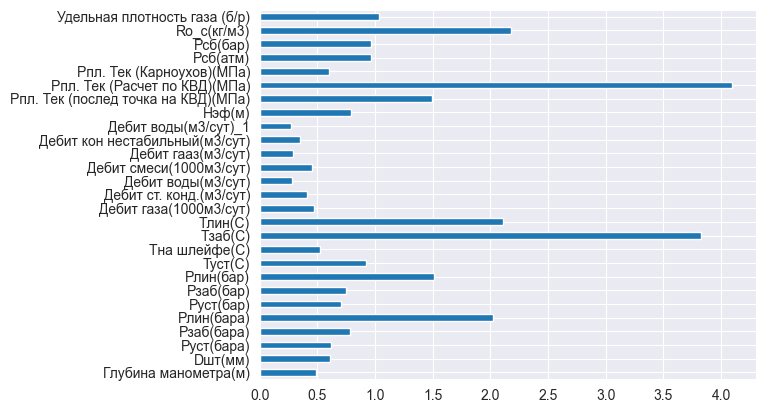

In [158]:
importance = pd.Series(compute_gain_ratio(data_frame)[TARGET_VARIABLES[1]])
importance.plot(kind='barh')

In [159]:
data_frame = remove_linearly_dependent_features(data_frame)
data_frame

less_important_column Руст(бара)
less_important_column Руст(бара)
less_important_column Руст(бара)
less_important_column Руст(бар)
less_important_column Рзаб(бар)
less_important_column Дебит смеси(1000м3/сут)
less_important_column Дебит воды(м3/сут)_1
less_important_column Pсб(атм)


,Глубина манометра(м),Dшт(мм),Рзаб(бара),Pлин(бара),Рлин(бар),Туст(С),Тна шлейфе(С),Тзаб(С),Tлин(С),Дебит газа(1000м3/сут),Дебит ст. конд.(м3/сут),Дебит воды(м3/сут),Дебит гааз(м3/сут),Дебит кон нестабильный(м3/сут),Нэф(м),Рпл. Тек (послед точка на КВД)(МПа),Рпл. Тек (Расчет по КВД)(МПа),Рпл. Тек (Карноухов)(МПа),Pсб(бар),Ro_c(кг/м3),Удельная плотность газа (б/р),G_total(кг/с),КГФ(т/тыс.м3)
2,3576.3,7.94,370.100000,101.800000,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,1610.368866,131.3,56.8000,45.25000,56.5000,NaN,92.376018,801.000000,0.669449,2.782623,0.000312
3,3576.3,9.53,364.600000,101.300000,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,2310.226429,158.5,56.8000,45.25000,56.5000,NaN,91.685171,801.000000,0.669449,3.697781,0.000289
4,3576.3,11.11,357.100000,101.600000,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,3039.489680,172.3,56.8000,45.25000,56.5000,NaN,90.204787,801.000000,0.669449,4.515073,0.000249
5,3576.3,12.70,347.400000,98.400000,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,3824.082686,181.5,56.8000,45.25000,56.5000,NaN,88.033555,801.000000,0.669449,5.217673,0.000224
6,3576.3,14.29,337.700000,99.200000,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,4299.104676,190.6,56.8000,45.25000,56.5000,NaN,88.527017,801.000000,0.669449,5.765092,0.000215
7,3576.3,9.53,286.400000,106.361669,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,1921.000000,119.0,56.8000,41.22431,48.3000,NaN,89.513940,789.800000,0.675000,3.076542,0.000241
8,3590.0,7.93,391.823775,NaN,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
9,3590.0,11.11,384.224400,NaN,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
10,3590.0,14.28,371.912399,NaN,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN
11,3590.0,17.46,346.192061,NaN,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN


<Axes: >

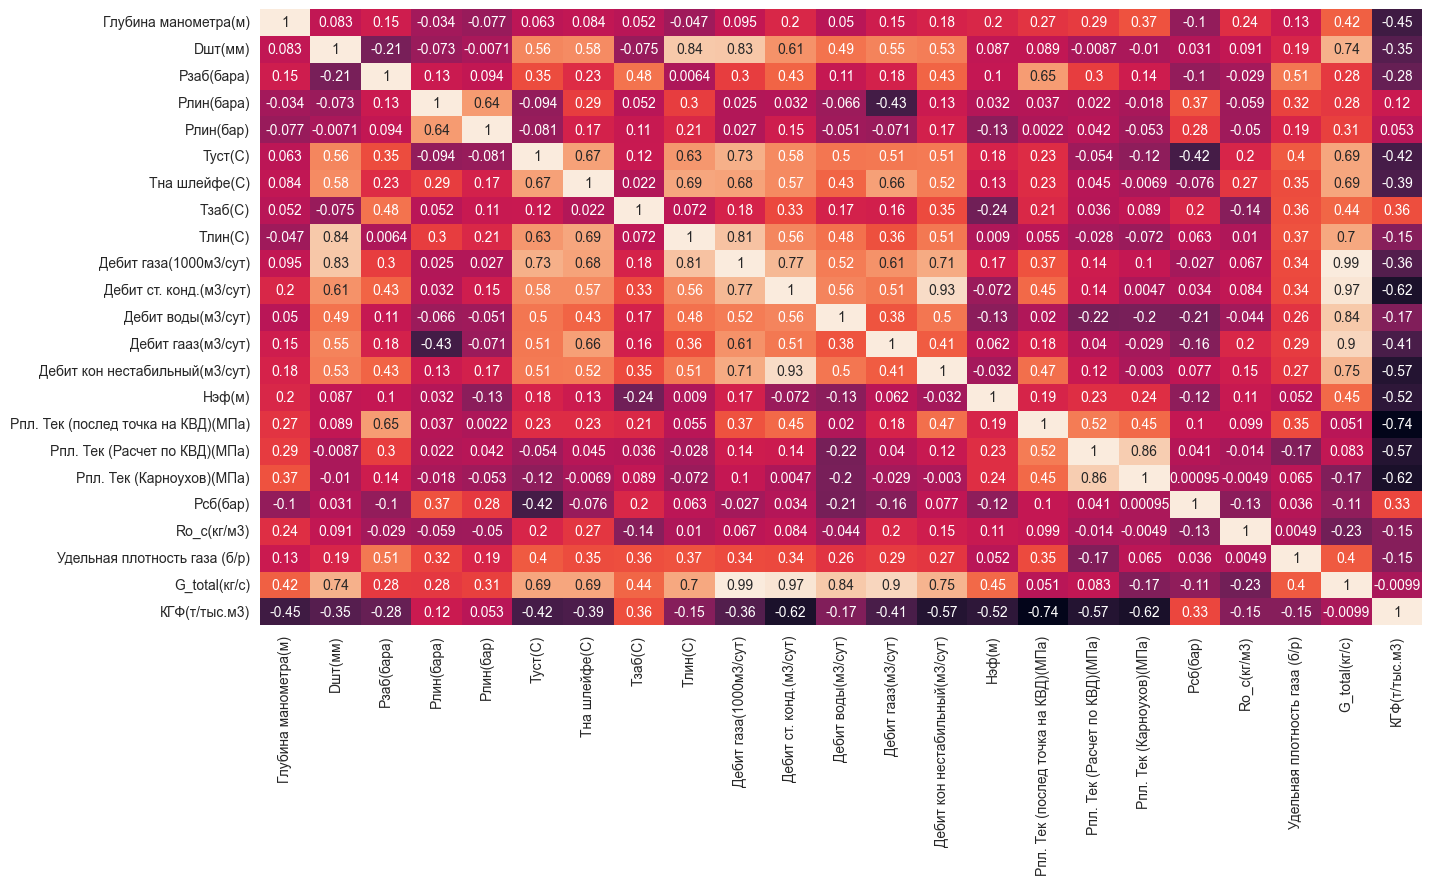

In [160]:
plt.figure(figsize=(15, 8))
sns.heatmap(data_frame.corr(method='pearson', numeric_only=True), annot=True, cbar=False)